In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 11.12.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 18.12.2021  23:59**

**Жесткий дедлайн: 20.12.2021  8:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? Если есть удалить.
* Найти и удалить выбросы по признаку `home_cost`. (Их не больше 15-х, не меньше 3-х)

In [3]:
duplicateRows = data[data.duplicated()]
duplicateRows #Полных дублей нет

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8707abfc40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8707b041c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8707abf9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8707b04700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8707b049a0>],
 'means': []}

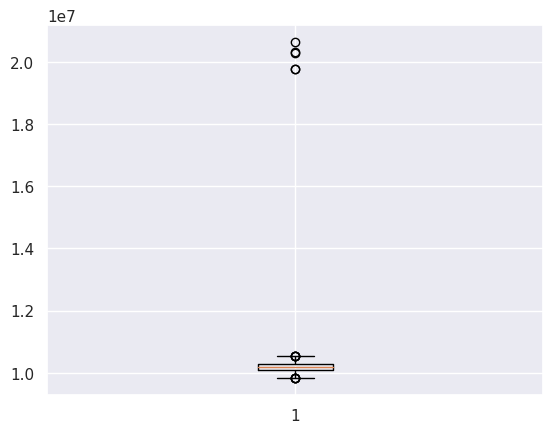

In [4]:
plt.boxplot(data['home_cost'])   

In [5]:
def outliers(data, collumn):                   # Функция для определения выбросов
    Q1 = data[collumn].quantile(0.25)          # Первый квартиль
    Q3 = data[collumn].quantile(0.75)          # Третий квартиль
    IQR = Q3 - Q1                            # Межквартильное расстояние
    lower_bound = Q1 - 1.5 * IQR             # Нижняя граница
    upper_bound = Q3 + 1.5 * IQR             # Верхняя граница
    outlier = data.index[ (data[collumn] < lower_bound) | (data[collumn] > upper_bound) ] #поиск выбросов
    
    return outlier
index_list = []                              # Пустой список
for collumn in ["home_cost"]:
    index_list.extend(outliers(data, collumn))
    
index_list      

[173, 714, 1140, 1779, 1825, 2070, 2966, 3307, 3380, 3912, 4014, 4727, 173]

In [6]:
len(index_list) 

13

In [7]:
# функция для удаления строк с выбросами
def remove(data, outlier):                 
    outlier = sorted(set(outlier))
    data = data.drop(outlier)
    return data

In [8]:
data_cleaned = remove(data, index_list)
data_cleaned.shape    

(5987, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8707987460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f87079879a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f87079871c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8707987ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f87057c81c0>],
 'means': []}

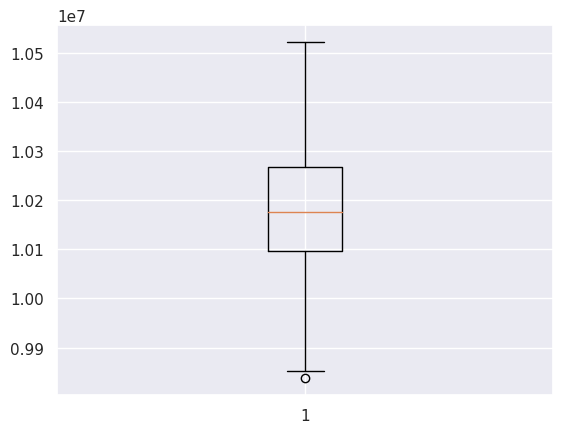

In [9]:
# Из-за удаления выбросов изменились значения границ и могли появиться новые выбросы. Проверим это
plt.boxplot(data_cleaned['home_cost']) 

In [10]:
# Нахождение нового выброса
index_list = []                              
for collumn in ["home_cost"]:
    index_list.extend(outliers(data_cleaned, collumn))
    
index_list

[4365]

In [11]:
data_cleaned = remove(data_cleaned, index_list)
data_cleaned.shape

(5986, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f870580f190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f870580f6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f870580eef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f870580fc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f870580feb0>],
 'means': []}

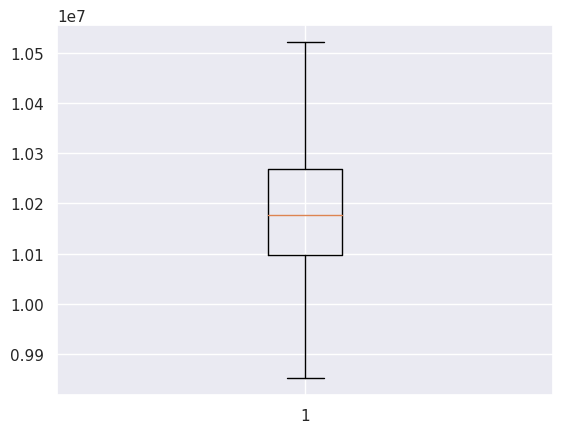

In [12]:
# Убедимся еще раз , что выбросов нет
plt.boxplot(data_cleaned['home_cost'])

# Проверка гипотез (15 баллов)

<div class="alert alert-info">

<b>Описание заданий раздела:</b>    
    
В этом разделел вам предстоит:
* Проверить предложенные утверждения визуально.
* Применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных.

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

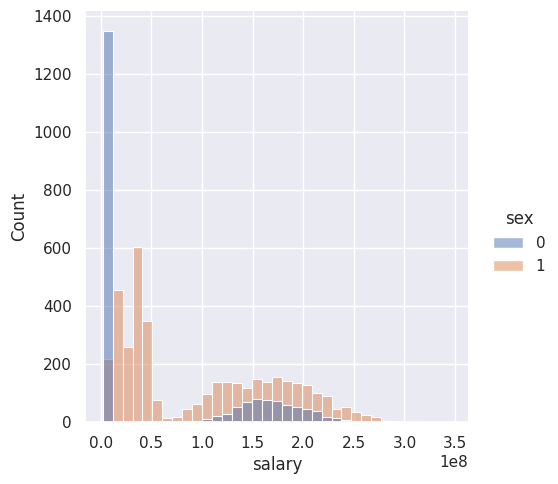

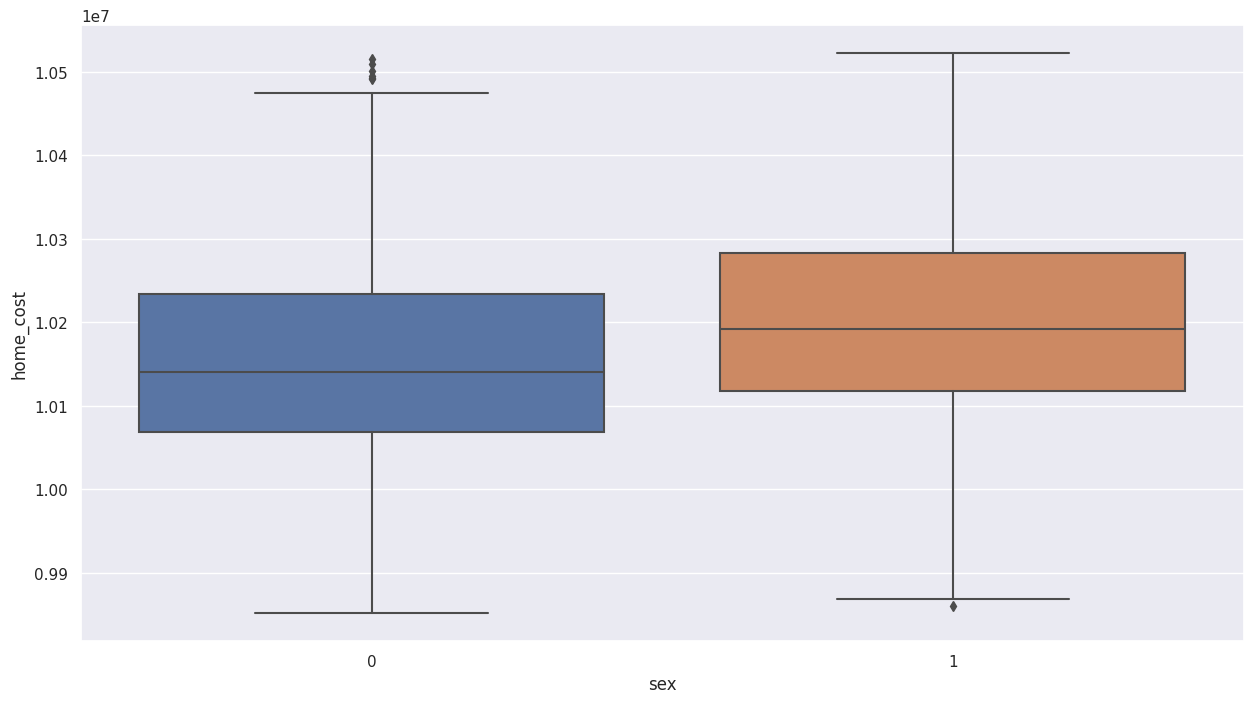

In [13]:
sub_data =  data_cleaned[(data_cleaned['sex']==0)|(data_cleaned['sex']==1)]

sns.displot(sub_data, x='salary', hue ='sex', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="sex", y="home_cost");

In [14]:
woman_salary = data_cleaned[data_cleaned['sex']==0]['salary']
man_salary = data_cleaned[data_cleaned['sex']==1]['salary']
#берем Критерий Стьюдента

t, p_value  = stats.ttest_ind(woman_salary, man_salary) # Критерий Стьюдента (t-test)

print('p-value', p_value)
print('t', t)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 5.054949089479571e-79
t -19.10410819853395
Выборки отличаются!


### Нет, мужчины имеют более высокую зарплату

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

<Figure size 1500x800 with 0 Axes>

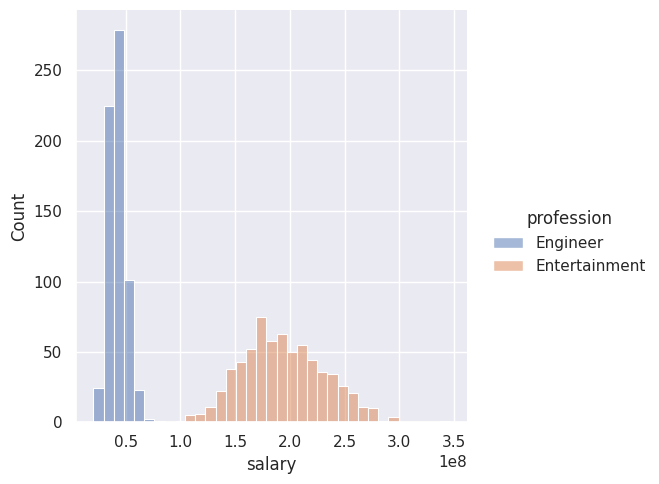

<Figure size 1500x800 with 0 Axes>

In [15]:
sub_data_cleaned =  data_cleaned[(data_cleaned['profession']=='Engineer')|(data_cleaned['profession']=='Entertainment')]

sns.displot(sub_data_cleaned, x='salary', hue ='profession', bins=35)


plt.figure(figsize=(15, 8))

In [16]:
Engineer_salary = data_cleaned[data_cleaned['profession']=='Engineer']['salary']
Entertainment_salary = data_cleaned[data_cleaned['profession']=='Entertainment']['salary']
# Так как распределение похоже на нормальное, то берем Критерий Стьюдента

t, p_value  = stats.ttest_ind(Engineer_salary, Entertainment_salary) # Критерий Стьюдента (t-test)

print('p-value', p_value)
print('t', t)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 0.0
t -100.1518525116712
Выборки отличаются!


### Нет, в сфере развлечений люди зарабатывают больше

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

<Figure size 1500x800 with 0 Axes>

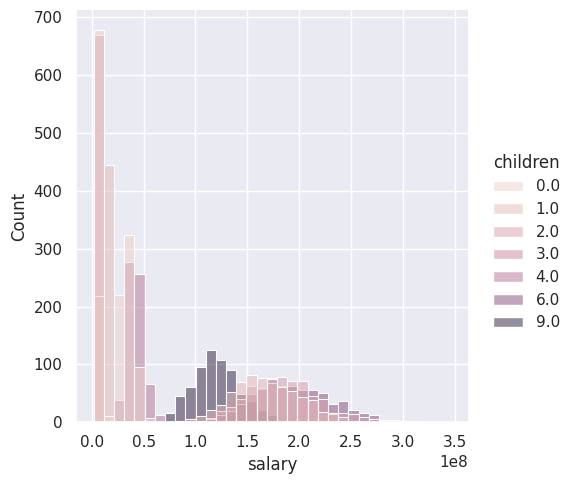

<Figure size 1500x800 with 0 Axes>

In [17]:
sub_data_cleaned =  data_cleaned[(data_cleaned['children']>3)|(data_cleaned['children']<=3)]

sns.displot(sub_data_cleaned, x='salary', hue ='children', bins=35)


plt.figure(figsize=(15, 8))

In [18]:
three_plus_salary = data_cleaned[data_cleaned['children']>3]['salary']
three_or_less_salary = data_cleaned[data_cleaned['children']<=3]['salary']

t, p_value  = stats.ttest_ind(three_plus_salary, three_or_less_salary) # Критерий Стьюдента (t-test)

print('p-value', p_value)
print('t', t)

alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 2.1774237895289007e-128
t 24.704010271606066
Выборки отличаются!


### Действительно, те у кого больше 3 детей зарабатывают больше

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

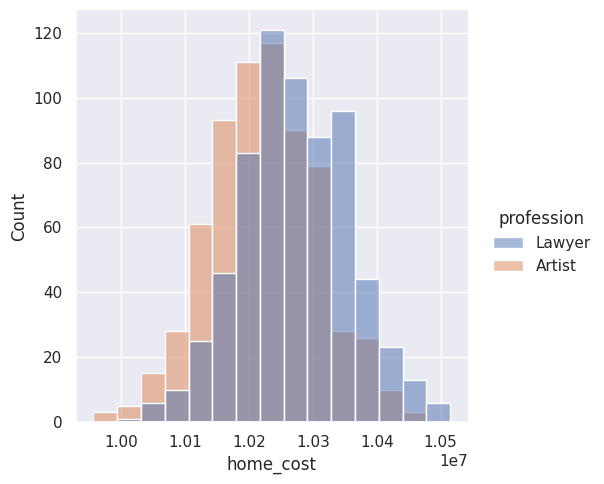

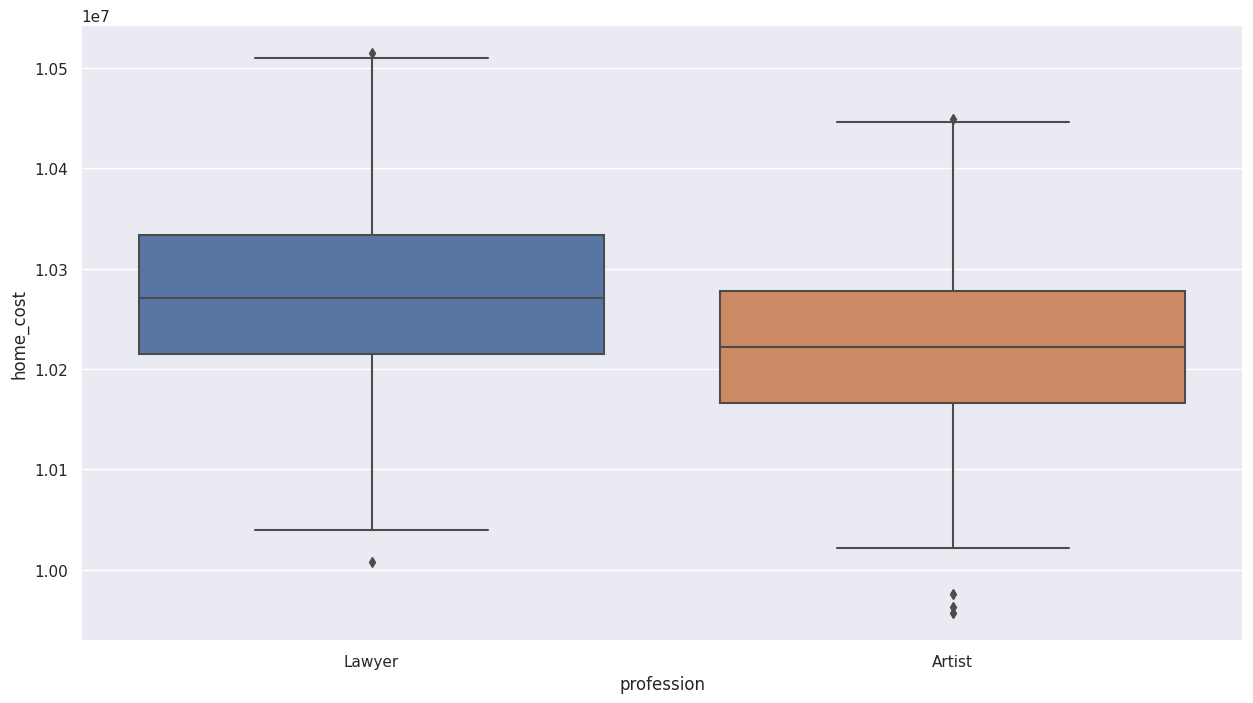

In [19]:
sub_data_cleaned =  data_cleaned[(data_cleaned['profession']=='Artist')|(data_cleaned['profession']=='Lawyer')]
sns.displot(sub_data_cleaned, x="home_cost", hue="profession", bins=15)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data_cleaned, x="profession", y="home_cost");

In [20]:
Artist = data_cleaned[data_cleaned["profession"] == 'Artist']["home_cost"]
Lawyer = data_cleaned[data_cleaned["profession"] == 'Lawyer']["home_cost"]


t, p_value  = stats.ttest_ind(Artist, Lawyer)

t, p_value 

(-10.312443126358874, 4.808361776839644e-24)

### Адвокаты живут в более дорогих домах

<div class="alert alert-warning">
    
* Прада ли, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке?

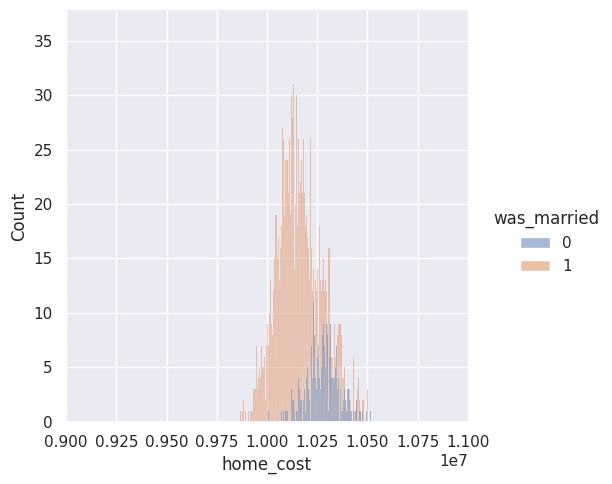

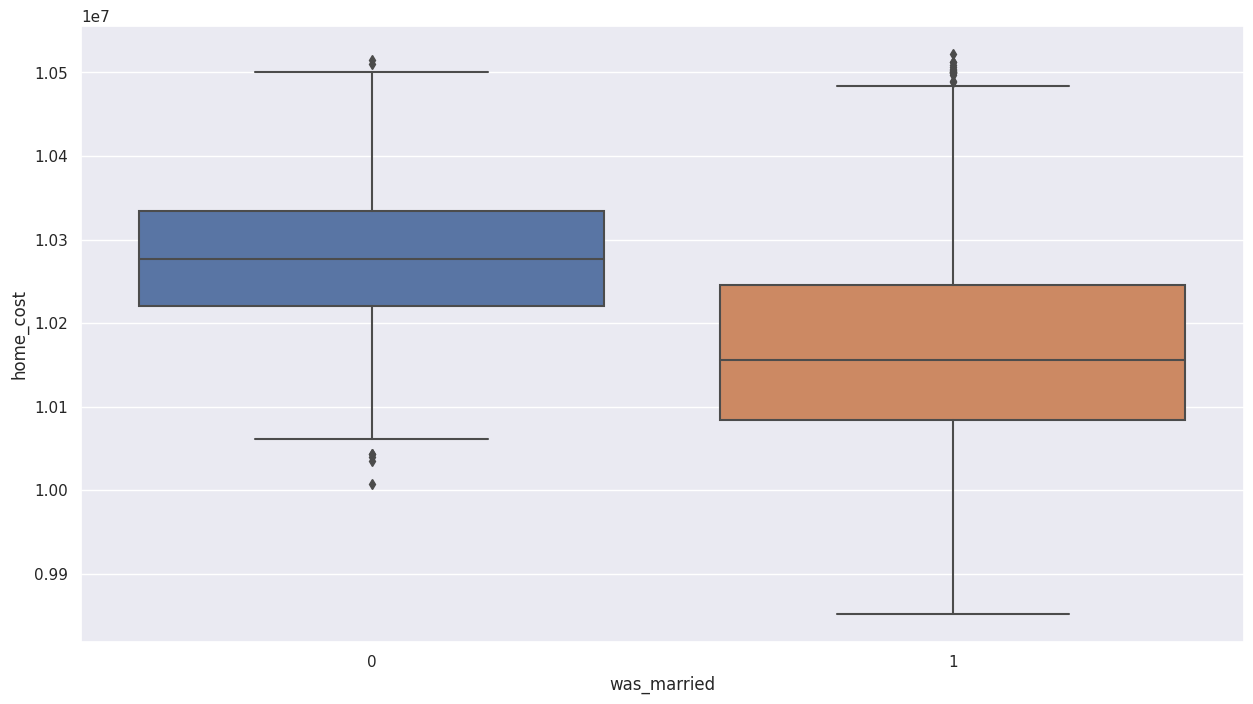

In [21]:
sub_data_cleaned =  data_cleaned[(data_cleaned['was_married']==1)|(data_cleaned['was_married']==0)]
plot = sns.displot(sub_data_cleaned, x="home_cost", hue="was_married", bins=505)
plot.set(xlim=(9000000, 11000000))

plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data_cleaned, x="was_married", y="home_cost");

In [22]:
was_married = data_cleaned[data_cleaned["was_married"] == 1]["home_cost"]
was_not_married = data_cleaned[data_cleaned["was_married"] == 0]["home_cost"]


t, p_value  = stats.ttest_ind(was_married, was_not_married)

t, p_value 

(-27.942227988500708, 1.3299689691573283e-161)

### Нет, у бывших в браке недвижимость дешевле

<div class="alert alert-warning">
    
* Прада ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - воспользуйтесь критерием хи-квадрат из библиотеки scipy

<AxesSubplot: xlabel='sex', ylabel='was_married'>

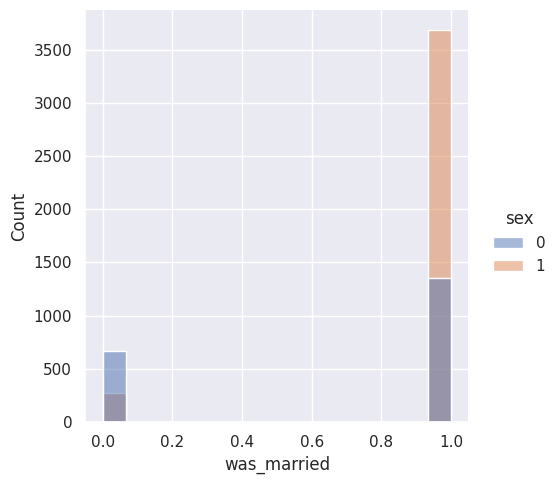

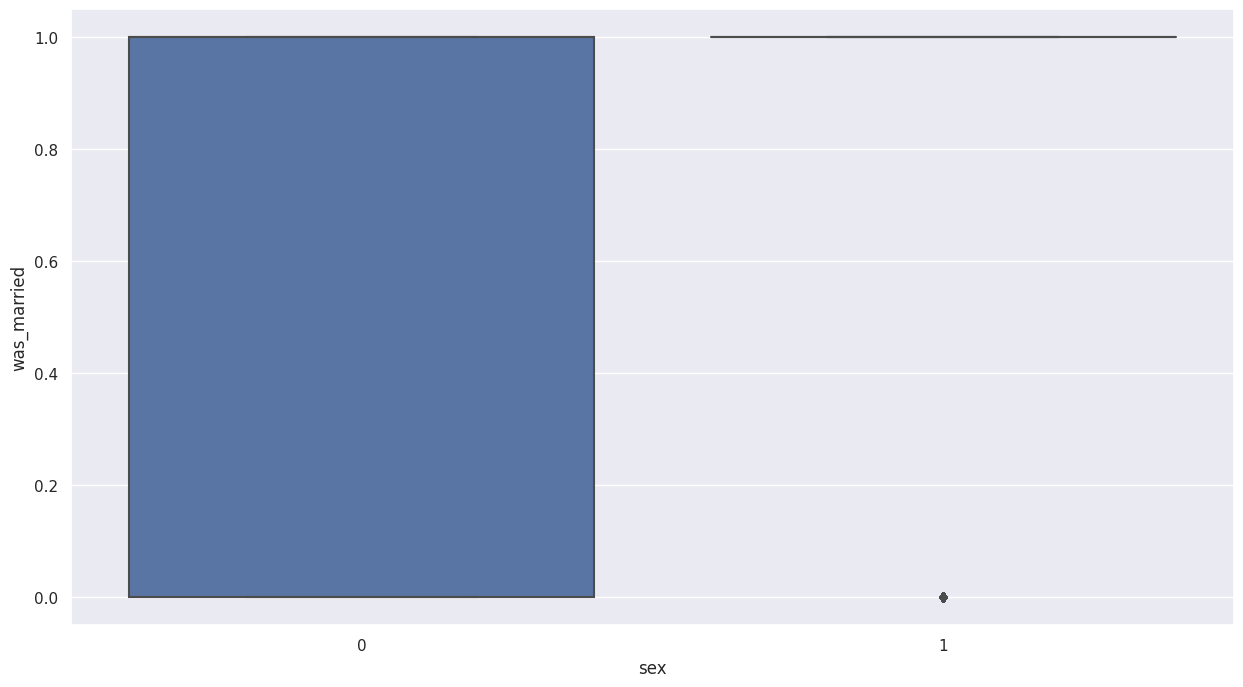

In [23]:
sub_data_cleaned =  data_cleaned[(data_cleaned['sex']==1)|(data_cleaned['sex']==0)]
plot = sns.displot(sub_data_cleaned, x="was_married", hue="sex", bins=15)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data_cleaned, x="sex", y="was_married")

In [24]:
woman_married = data.loc[(data['sex']==0) & (data['was_married']==1)]
man_married = data.loc[(data['sex']==1) & (data['was_married']==1)]
woman_not_married = data.loc[(data['sex']==0) & (data['was_married']==0)]
man_not_married = data.loc[(data['sex']==1) & (data['was_married']==0)]

data1 = [[len(woman_married), len(woman_not_married)],
 [len(man_married), len(man_not_married)]]
print(data1)
_, pvalue, _, _ = scipy.stats.chi2_contingency(data1) # fisher_exact(x) # Точный тест Фишера
 
pvalue

[[1359, 670], [3693, 278]]


3.2003834078153325e-150

### Значение pvalue сильно меньше 0.05 поэтому мужчины действительно чаще бывают в браке

# Гипотезы при множественном тестировании (10 баллов)

In [25]:
# Подсказка: 
# - дисперсионнай анализ  f_oneway()
# - Крускал Уоллиса

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

In [26]:
df_new = data_cleaned[data_cleaned.profession.isin(['Homemaker','Marketing','Healthcare','Executive'])] #Отделим нужные нам профессии
df_new.index = np.arange(len(df_new))
df_new

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
0,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801
1,1,3.0,2.106287e+06,0,21.0,Homemaker,9.980108e+06,NaN,0.387612
2,1,1.0,1.284116e+07,1,9.0,Marketing,1.017361e+07,1.0,0.335858
3,1,0.0,3.784179e+06,0,17.0,Healthcare,1.019971e+07,NaN,0.386882
4,1,0.0,2.544520e+07,1,3.0,Executive,1.008142e+07,0.0,0.408286
...,...,...,...,...,...,...,...,...,...
2666,1,0.0,2.907133e+06,0,17.0,Healthcare,1.001875e+07,1.0,0.495484
2667,1,0.0,3.589436e+07,1,3.0,Executive,1.007038e+07,1.0,0.599222
2668,1,3.0,2.454208e+06,0,20.0,Homemaker,1.009348e+07,1.0,0.259710
2669,1,0.0,3.335405e+06,0,17.0,Healthcare,1.016696e+07,0.0,0.258779


In [27]:
df_new.drop(['drive_info','was_married','children','sex','age','home_cost','happyness'], axis=1, inplace=True) #Откидываем все ненужные столбцы

/tmp/ipykernel_52494/2645888673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['drive_info','was_married','children','sex','age','home_cost','happyness'], axis=1, inplace=True) #Откидываем все ненужные столбцы


In [28]:
Homemaker = df_new[df_new.profession.isin(['Homemaker'])]
Homemaker 
Marketing = df_new[df_new.profession.isin(['Marketing'])]
Marketing
Healthcare = df_new[df_new.profession.isin(['Healthcare'])]
Healthcare 
Executive = df_new[df_new.profession.isin(['Executive'])]
Executive[['salary']]                                    #Сейчас мы имеем 4 таких списка для каждой профессии 

,salary
4,2.544520e+07
6,3.488284e+07
27,2.969983e+07
29,4.165749e+07
31,3.383944e+07
...,...
2654,2.397532e+07
2656,3.350644e+07
2660,4.189111e+07
2662,3.647966e+07


In [29]:
stats.kruskal(Homemaker, Marketing, Healthcare, Executive) # - Крускал Уоллис

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


KruskalResult(statistic=array([2485.90546457, 2670.        ]), pvalue=array([0., 0.]))

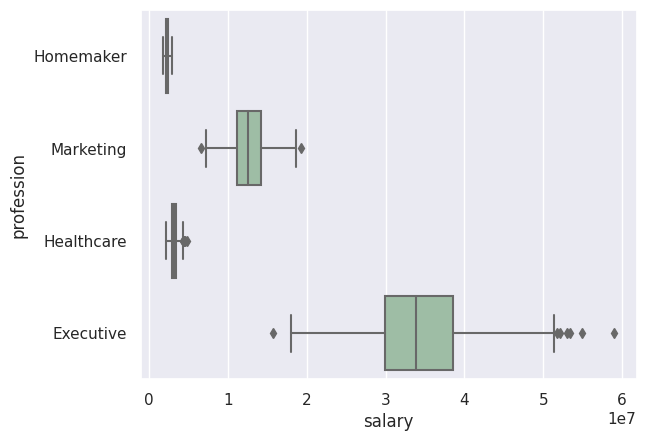

In [30]:
# Построим 'коробки с усами'
ax = sns.boxplot(y='profession', x='salary', data=df_new, color='#99c2a2')
plt.show()

In [31]:
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(Homemaker['salary'], Marketing['salary'], Healthcare['salary'], Executive['salary'])  # - дисперсионнай анализ  f_oneway()

print(fvalue, pvalue)

12621.234548516166 0.0


### Среди этих 4 профессий зарплаты очень сильно отличаются

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

In [32]:
df_new_second = data_cleaned[data_cleaned.profession.isin(['Doctor','Entertainment','Lawyer'])] #Отделим нужные нам профессии
df_new_second

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
7,1,2.0,1.514086e+08,1,32.0,Doctor,1.022668e+07,1.0,0.404290
11,1,6.0,1.703990e+08,1,14.0,Entertainment,1.033253e+07,NaN,0.531429
...,...,...,...,...,...,...,...,...,...
489,1,6.0,1.627892e+08,1,14.0,Entertainment,1.035572e+07,0.0,0.427254
492,1,2.0,2.233623e+08,1,32.0,Doctor,1.021793e+07,NaN,0.456444
493,0,1.0,1.399202e+08,0,10.0,Lawyer,1.006127e+07,1.0,0.156439


In [33]:
df_new_second.drop(['drive_info','was_married','children','sex','age','home_cost','happyness'], axis=1, inplace=True) #Откидываем все ненужные столбцы

/tmp/ipykernel_52494/2018128127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_second.drop(['drive_info','was_married','children','sex','age','home_cost','happyness'], axis=1, inplace=True) #Откидываем все ненужные столбцы


In [34]:
Doctor = df_new_second[df_new_second.profession.isin(['Doctor'])]
Doctor
Entertainment = df_new_second[df_new_second.profession.isin(['Entertainment'])]
Entertainment 
Lawyer = df_new_second[df_new_second.profession.isin(['Lawyer'])]
Lawyer[['salary']]                                      #Сейчас мы имеем 3 таких списка для каждой профессии 

,salary
id,
3,1.268718e+08
12,2.306753e+08
22,1.415626e+08
24,1.239523e+08
37,1.826406e+08
...,...
447,1.874681e+08
470,1.487348e+08
471,2.013155e+08


In [35]:
stats.kruskal(Doctor, Entertainment, Lawyer) # - Крускал Уоллис

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


KruskalResult(statistic=array([ 150.49878103, 1991.        ]), pvalue=array([2.08739641e-33, 0.00000000e+00]))

In [36]:
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(Doctor['salary'], Entertainment['salary'], Lawyer['salary']) # - дисперсионнай анализ  f_oneway()

print(fvalue, pvalue)

88.92649642294668 1.023070527084598e-37


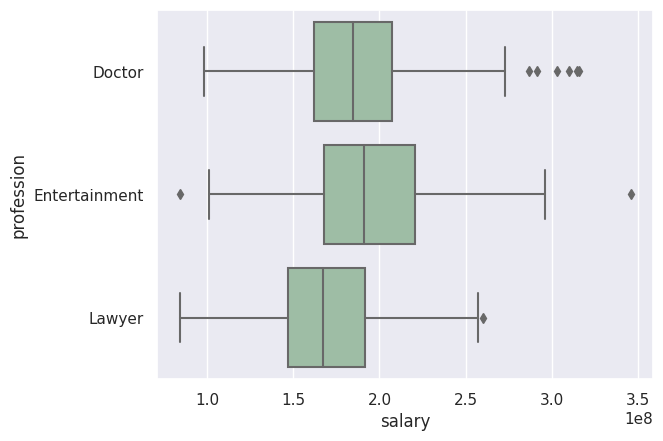

In [37]:
# Построим 'коробки с усами'
ax = sns.boxplot(y='profession', x='salary', data=df_new_second, color='#99c2a2')
plt.show()

### Среди этих 3 профессий зарплаты в среднем отличаются. Т.к. p-значение меньше 0.05 поэтому мы отвергаем нулевую гипотезу , что зарплаты у всех трех профессий одинаковые.

# Регрессионный Анализ (20 баллов)

Взглянем от чего зависит уровень счастья

In [38]:
import statsmodels.formula.api as smf

# Рекомендации: 
# Используйте библиотку statsmodels для оценки вклада каждого фактора
# Выведения отчета о модели - model.summary()

<div class="alert alert-warning">
    
Выполните следующие задания и на основе результатов ответьте на вопросы:

* Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)

* Существует ли связь между уровнем счастья и зарплатой?

* Насколько сильны эти отношения?

* Как факт брака способствуют стоимости недвижимости?

* Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

* Постройте график зависимостей целевой переменной от приведенных числовых факторов. 
    
* Какие признаки не влияют на уровень счастья? (стат. значимость)
    
* Какой признак самый сильный?
    
* Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

* Наблюдается ли гетероскедастичность в остатках?
    
* Есть ли в данных автокоррелированность?  

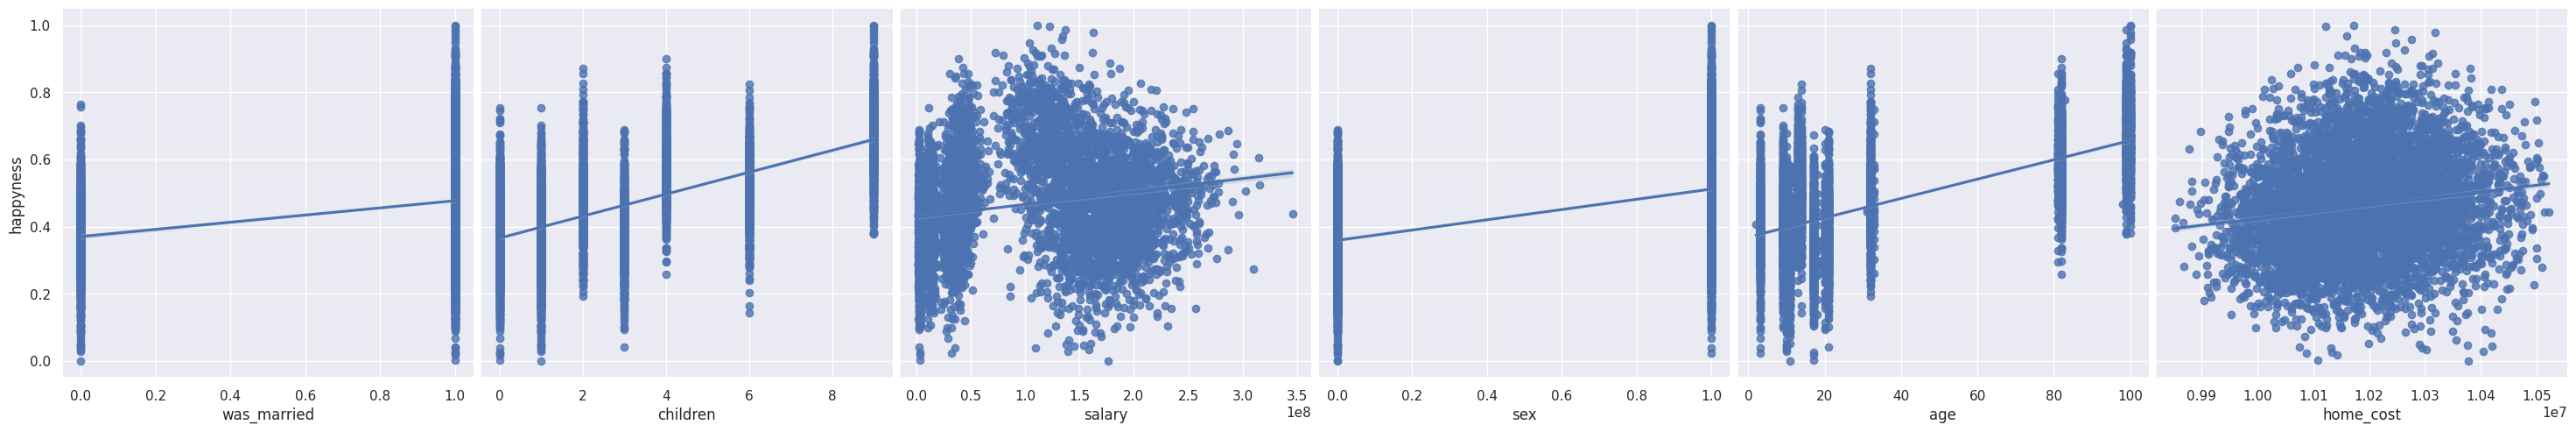

In [39]:
# Постройм регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)
sns.pairplot(
    data_cleaned, 
    y_vars='happyness', 
    x_vars=['was_married', 'children', 'salary', 'sex', 'age', 'home_cost'], 
    height=5,
    kind='reg',
    diag_kind=None
); 

In [40]:
# Найдем связь между уровнем счастья и зарплатой
model = smf.ols('happyness ~ salary', data=data_cleaned)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              happyness   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     250.3
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           2.94e-55
Time:                        23:06:50   Log-Likelihood:                 2837.0
No. Observations:                5986   AIC:                            -5670.
Df Residuals:                    5984   BIC:                            -5657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4279      0.003    151.082      0.0

### Переменная salary значима, так как p-значение для проверки гипотезы о том, что она равна нулю оказалось очень маленьким, наблюдаемое значение статистики 15.538. Оно лежит глубоко в хвосте нашего распределения. 

In [41]:
res.params

Intercept    4.278639e-01
salary       3.841118e-10
dtype: float64

### Насколько сильны эти отношения? Эти значения можно интерпретировать как HAPPYNESS(i) = 0.43 + 3.7e-10 * SALARY(i) т.к. число очень маленькое, то зарплата почти не влияет на уровень счастья

In [42]:
# Найдем как факт брака способствуют стоимости недвижимости
model = smf.ols('home_cost ~ was_married', data=data_cleaned)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              home_cost   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     780.8
Date:                Sun, 20 Nov 2022   Prob (F-statistic):          1.33e-161
Time:                        23:06:50   Log-Likelihood:                -78037.
No. Observations:                5986   AIC:                         1.561e+05
Df Residuals:                    5984   BIC:                         1.561e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.028e+07   3612.485   2844.635      

### - Коэффициент перед `was_married` отрицательный значит мы можем сказать, что цена дома тех кто был в браке падает по сравнению с теми кто в браке не был

In [43]:
model = smf.ols('happyness ~ was_married + children + salary + sex + age + home_cost', data=data_cleaned)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              happyness   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     940.1
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:06:50   Log-Likelihood:                 4703.0
No. Observations:                5986   AIC:                            -9392.
Df Residuals:                    5979   BIC:                            -9345.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1091      0.169      0.645      

<div class="alert alert-warning">
Какие признаки не влияют на уровень счастья? (стат. значимость)
Какой признак самый сильный?

 - Уравнение значимо в целом, значение F-статистики попадает глубоко в хвост 
 - Коэффициент перед `home_cost`  незначимый
 - Возраст влияет больше всего

### > Если модель специфицирована верно и выполнены все предпосылки, мы можем сделать вывод, что повешение цены дома не повышет уровень счастья 

## Построим графики зависимостей

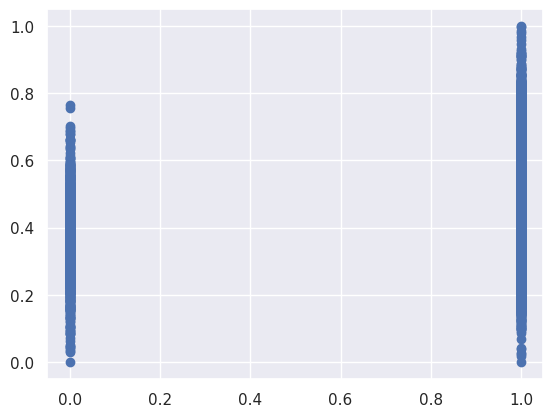

In [44]:
plt.scatter(data_cleaned.was_married, data_cleaned.happyness)

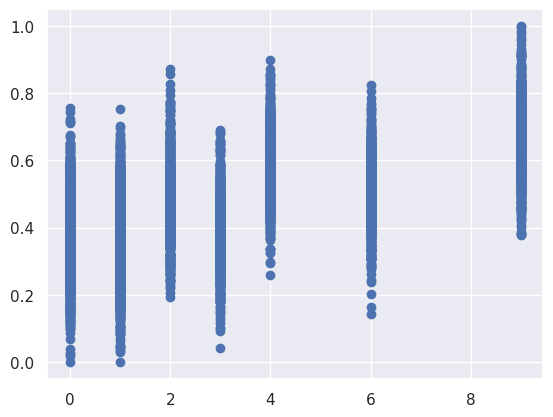

In [45]:
plt.scatter(data_cleaned.children, data_cleaned.happyness)

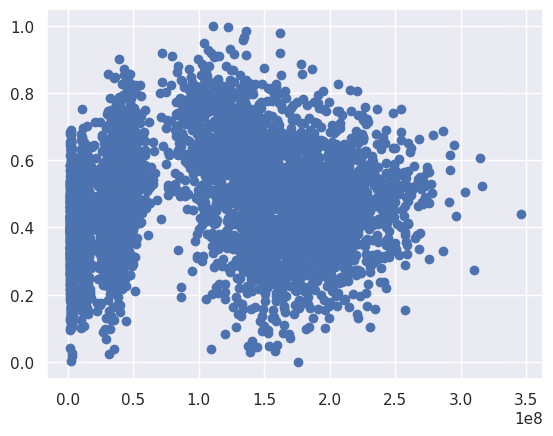

In [46]:
plt.scatter(data_cleaned.salary, data_cleaned.happyness)

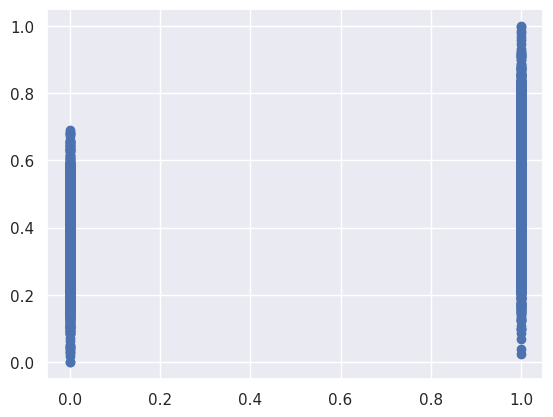

In [47]:
plt.scatter(data_cleaned.sex, data_cleaned.happyness)


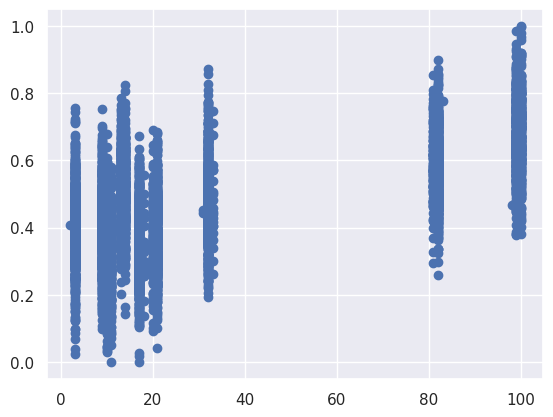

In [48]:
plt.scatter(data_cleaned.age, data_cleaned.happyness)

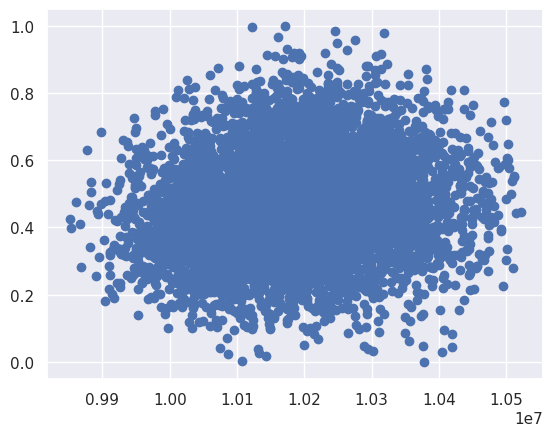

In [49]:
plt.scatter(data_cleaned.home_cost, data_cleaned.happyness)

In [50]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(res.resid, data_cleaned[['was_married', 'children', 'salary', 'sex', 'age', 'home_cost']].values)

(2003.0985085684385, 0.0, 501.24802680527995, 0.0)

In [51]:
model = smf.ols('happyness ~ was_married + children + salary + sex + age + home_cost', data=data_cleaned)
res = model.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              happyness   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     1027.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:06:52   Log-Likelihood:                 4703.0
No. Observations:                5986   AIC:                            -9392.
Df Residuals:                    5979   BIC:                            -9345.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1091      0.170      0.641      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


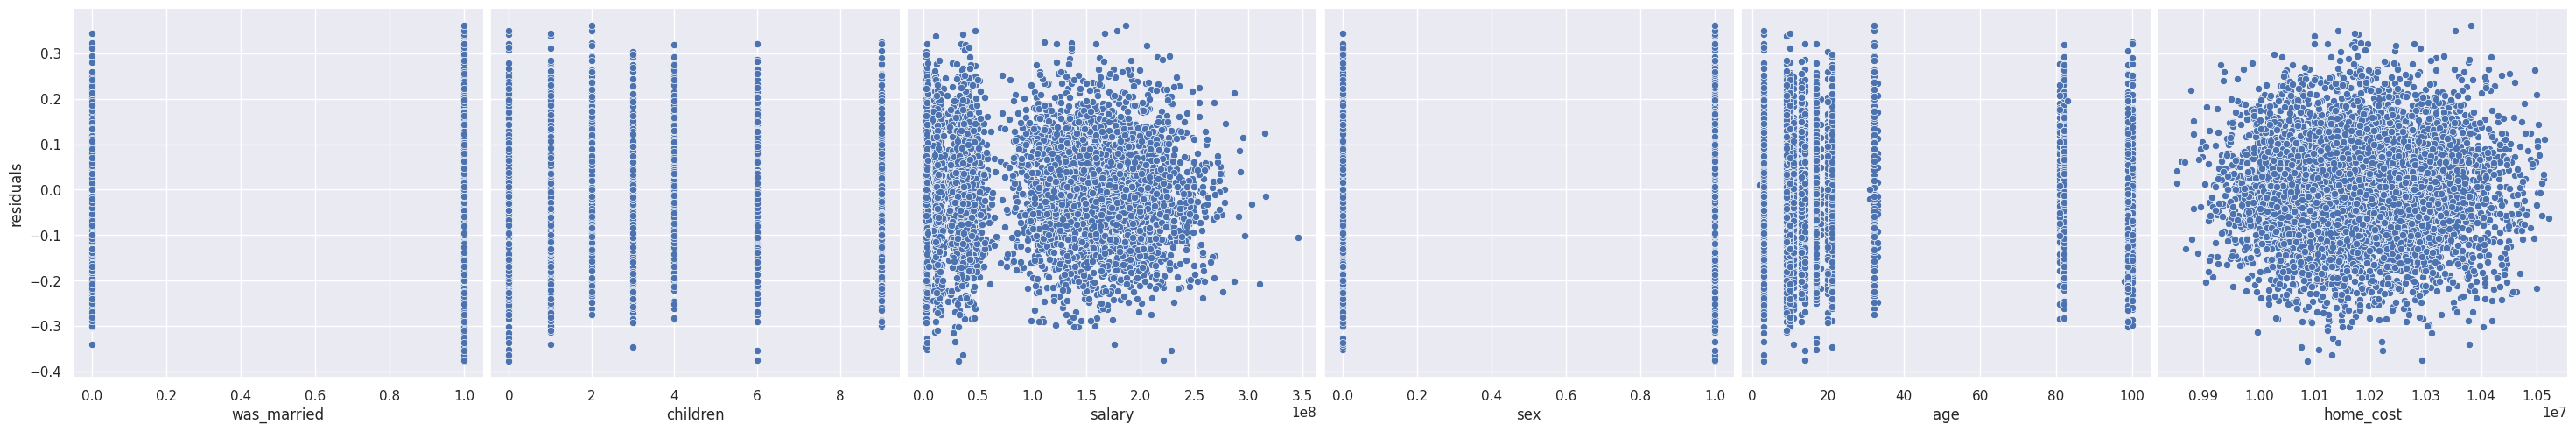

In [52]:
#Построим графики остатков
data_cleaned['residuals'] = res.resid

sns.pairplot(
    data_cleaned, 
    y_vars='residuals', 
    x_vars=['was_married', 'children', 'salary', 'sex', 'age', 'home_cost'], 
    height=5,
    diag_kind=None
);

In [53]:
# Проведем формальный тест на гомоскедастичность
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(res.resid, data_cleaned[['was_married', 'children', 'salary', 'sex', 'age', 'home_cost']].values)

(2003.0985085684385, 0.0, 501.24802680527995, 0.0)

Видим, что pvalue (последнее значение) равно 0 , что меньше уровня значимости. Гипотеза о гомоскедастичности отвергается. Можно ввести корректировку и исправить значения ошибок прямо при оценивании модели

*Есть ли в остатках автокоррелированность?*

Для проверки этой предпосылки нам достаточно посмотреть в протокол оценивания и найти там строчку Durbin-Watson. Это статистика Дарбина-Уотсона. Она в районе двух, следовательно автокоррелированности в остатках нет.

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**